<a href="https://colab.research.google.com/github/NaveenPaulBosco/BubbleSort/blob/master/ML_on_CLAMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised and Unsupervised Machine Learning on CLAMP Dataset
### Introduction
Malicious programs or malware is an intentionally written program to indulge in various malicious activities, ranging from stealing user’s information to cyber-espionage. The behavioral dynamism exposed by the malware is dependent on various factors such as nature of the attack, sophisticated technology and the rapid increase in exploitable vulnerabilities. Malware attacks also increased along with the rapid growth in the use of digital devices and internet. The exponential increase in the creation of new malware in the last five years has made malware detection a challenging research issue.

**NOTE**: This project will be autograded and will require filling out a submission json file. Each section has a python dictionary that you can fill out as you go or you can manually insert answers into the sample json we provide. No credit will be provided even for correct answers in an improperly formatted/key'ed json file so it is probably just easier to build them in the notebook. All answers are expected to be numbers ie 5.1 or strings ie "feature1" in the dictionary or json.

Good Luck!

Since we use an autograder and a seed for this assignment you may run into issues if you dont use the following package versions in your code.

**PACKAGE VERSIONS** 
* pandas==1.3.5
* numpy==1.21.6
* scikit-learn==1.0.2



In [1]:
!pip install pandas==1.3.5 numpy==1.21.6 scikit-learn==1.0.2 joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 20.5 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0




---


## Initialization
Run the code cell below to load necessary Python libraries and load the Clamp Malware data. 

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
%matplotlib inline

In [3]:
def create_seed_from_email(email_str):
  running_total = 0
  for char in email_str:
    running_total += ord(char)
  return running_total
## TODO: Change the email below to your gradescope email to create your seed
seed = create_seed_from_email("nbosco7@gatech.edu")
seed

1747

In [6]:
# Load the Clamp Data File CLAMP
data = pd.read_csv("ClaMP_Raw-51842.csv")
data.fillna(0)

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,...,1194954,3,64,1048576,4096,1048576,4096,0,16,0
1,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,1048576,4096,1048576,4096,0,16,0
2,23117,144,3,0,4,0,65535,0,184,0,...,67688,2,320,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,...,113668,2,1344,1048576,4096,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,...,69089,2,33088,262144,8192,1048576,4096,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,29360128,36864,28311552,12288,0,16,1
3326,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,3145728,12288,23068672,36864,0,16,1
3327,23117,144,3,0,4,0,65535,0,184,0,...,78801,2,32768,1048576,4096,1048576,4096,0,16,1
3328,23117,144,3,0,4,0,65535,0,184,0,...,120490,2,0,1048576,4096,1048576,4096,0,16,1


In [7]:
# This displays the top 5 Records
display(data.head(5))

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,...,1194954,3,64,1048576,4096,1048576,4096,0,16,0
1,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,1048576,4096,1048576,4096,0,16,0
2,23117,144,3,0,4,0,65535,0,184,0,...,67688,2,320,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,...,113668,2,1344,1048576,4096,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,...,69089,2,33088,262144,8192,1048576,4096,0,16,0


In [8]:
# This displays the bottom 5 Records
display(data.tail(5))

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
3325,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,29360128,36864,28311552,12288,0,16,1
3326,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,3145728,12288,23068672,36864,0,16,1
3327,23117,144,3,0,4,0,65535,0,184,0,...,78801,2,32768,1048576,4096,1048576,4096,0,16,1
3328,23117,144,3,0,4,0,65535,0,184,0,...,120490,2,0,1048576,4096,1048576,4096,0,16,1
3329,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,4194304,16384,19922944,4096,0,16,1


**NOTE:** It may be helpful to learn about the Pandas library to succeed on the assignment. 

The documentation for Pandas can be found at https://pandas.pydata.org/docs/ 

If you prefer videos, one useful tutorial is the Complete Python Pandas Data Science Tutorial at https://www.youtube.com/watch?v=vmEHCJofslg



---


## Section 1: Data Exploration
Our Dataset contains records of information gathered from Malware and Not-Malware Portable Executable (PE) Files. 

In this section we will do some of the intial exploration of the data (and how it was generated) and begin to create some graphs and summary statistics to understand the dataset better.





Beyond just printing out values of records and looking through them by hand it is important to spend time on a step of the process called Exploratory Data Analysis (EDA) in which we create and analyze graphs, summary statistics and other views of the data to understand it better. This usually also means reading documentation about the data to understand how we should use it. We have provided 2 examples here for you (first is a histogram of each feature and second is a more automated report from an opensource library Pandas Profiling)

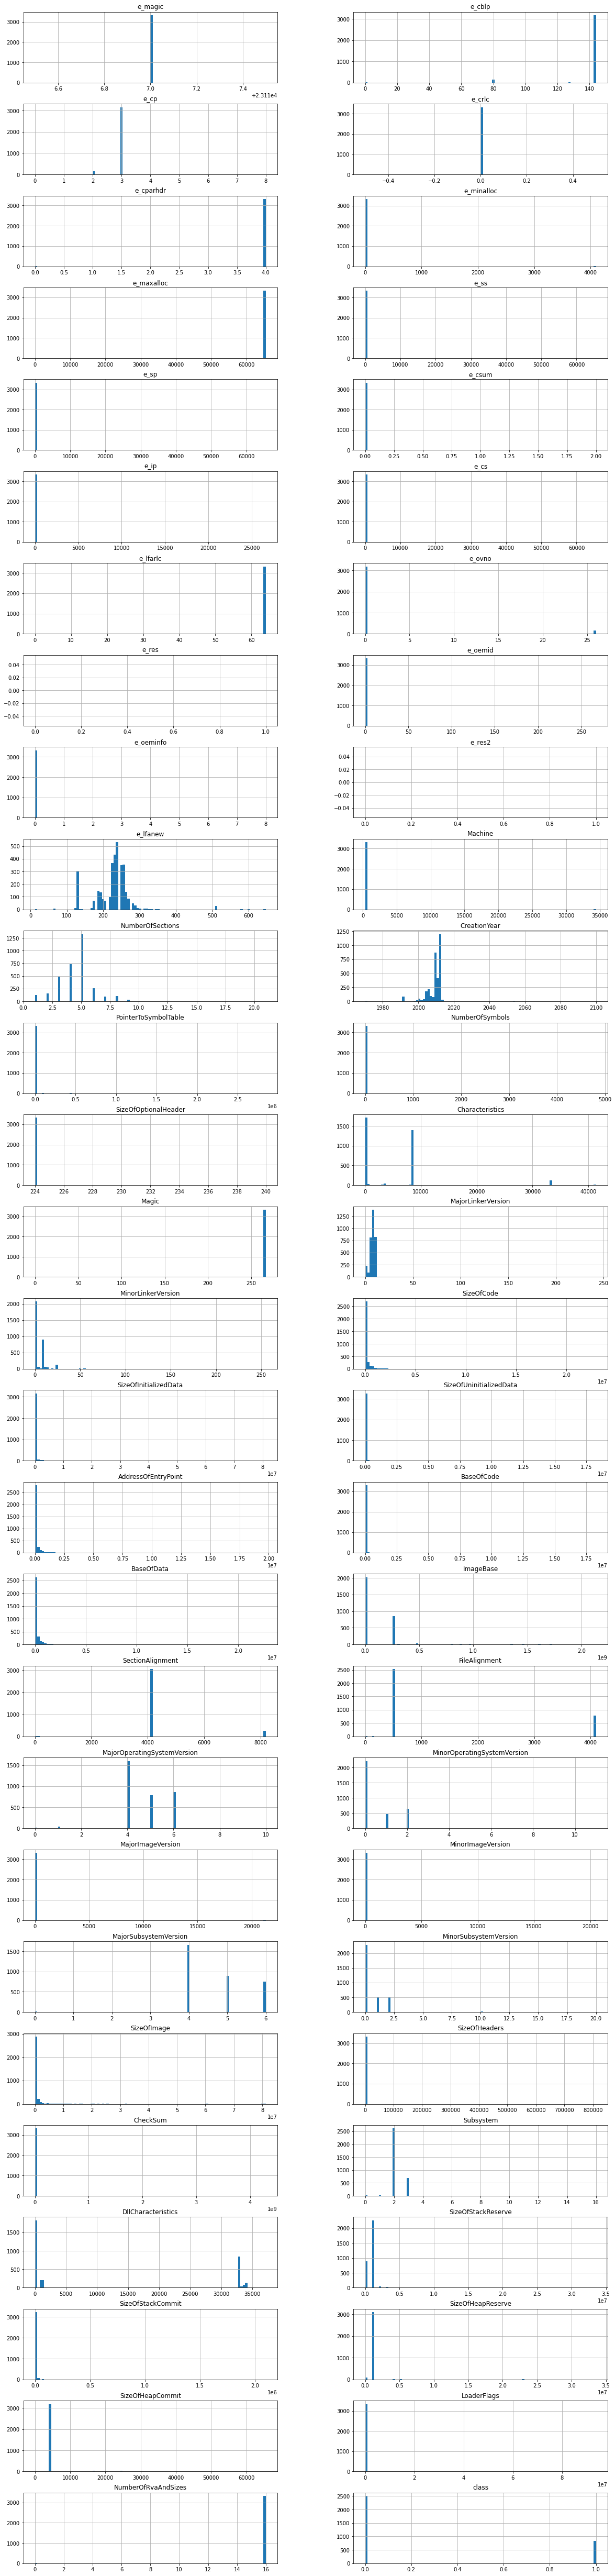

In [9]:
#Display the distribution of the dataset (Note: that the last column from this dataset, 'Class', will be our target label)
columns =data.columns.values.tolist()
data[columns].hist(stacked=False, bins=100, figsize=(20,180), layout=(56,2));

In [10]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.0 MB 7.6 MB/s 
     |████████████████████████████████| 102 kB 23.5 MB/s 
     |████████████████████████████████| 690 kB 45.8 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 9.8 MB 47.2 MB/s 
     |████████████████████████████████| 4.7 MB 54.1 MB/s 
     |████████████████████████████████| 296 kB 57.0 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315269 sha256=99dae89722a4231d162eeab9529249962336d4a69359248eb8ebba4bef038e50
  Stored in directory: /tmp/pip-ephem-wheel-cache-1mz3tbzb/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=25da9c366ad02cca2d192ff1a3e68cdd02c6835132146660c45a81df29cca06a
  Stored in directory: /root/.cache/pip/whe

In [11]:
profile = ProfileReport(data, minimal=True)

In [12]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The class column contains a 1 if the target is a Malware sample and a 0 if the target is a Not-Malware sample. A cursory investigation of the dataset will determine how many instances fit into either group, and will tell us about the percentage of these instances with malware. In the code cell below, you will need to compute the following:
*  The total number of records, `'n_records'`
- The number of instances without malware, `'n_non_malware'`.
- The number of instances of malware `'n_malware'`.
- The percentage of instances with malware, `'greater_percent'`.

In [13]:
#Total number of records
n_records = len(data)
#TODO Complete this code: Hint class is the Target

#Number of records where malware was not detected
n_non_malware = len(data.loc[data['class'] == 0])
#TODO Complete this code: Hint class is the Target

#Number of records where where malware was detected
n_malware =  len(data.loc[data['class'] == 1])
#TODO Complete this code: Hint class is the Target

# Percentage of instances of malware
greater_percent =  (n_malware / n_records) * 100
#TODO Complete this code: Hint class is the Target

# Print the results
print("Total number of records: {}".format(n_records))
print("The number of records without Malware: {}".format(n_non_malware))
print("The number of records with Malware: {}".format(n_malware))
print("Percentage of instances where malware is detected: {}%".format(greater_percent))

Total number of records: 3330
The number of records without Malware: 2501
The number of records with Malware: 829
Percentage of instances where malware is detected: 24.894894894894897%


In [14]:
section_1 = {    
    "n_records": n_records,
    "n_non_malware": n_non_malware,
    "n_malware": n_malware,
    "greater_percent": greater_percent
    }

In [15]:
import json
all_sections = {**section_1}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

### Check the data types for the dataset.  


In [16]:
# Get the data types from the dataset and return a count in unique_data_types
unique_data_types = len(data.dtypes.unique())
print("There are {} unique data types".format(unique_data_types))

There are 2 unique data types


### Additional Exploration
Typically Additional data exploration through Graphs, Data Statistics and Domain Expertise is done. We wont be grading you on this but if you have extra time feel free to take the time to create plots that help you understand the data source better and consider new features that could be created from one or more of the current features. 

### **Feature set**     

To learn more about how this dataset was created see the github page: https://github.com/urwithajit9/ClaMP. The features for this dataset are extracted from a windows PE file using pefile: https://github.com/erocarrera/pefile

You will probably need to do some aditional research outside of what we provide here to understand what a PE file is and what these features relate to.

Some Additional Resources:
* https://learn.microsoft.com/en-us/windows/win32/debug/pe-format
* https://en.wikipedia.org/wiki/Portable_Executable
* https://medium.com/ax1al/a-brief-introduction-to-pe-format-6052914cc8dd
* https://resources.infosecinstitute.com/topic/presenting-the-pe-header/


Here are some highlights:

The features are based on DOS_Header, FILE_HEADER AND OPTIONAL_HEADER. If any exception happens
then the values will be assigned as zero for that header. Many PE files don't have DOS_Header then all the header will be assigned '0'.

IMAGE_DOS_HEADER (19)  
* "e_magic", "e_cblp", "e_cp","e_crlc","e_cparhdr",
* "e_minalloc","e_maxalloc","e_ss","e_sp",
* "e_csum","e_ip","e_cs","e_lfarlc","e_ovno","e_res",
* "e_oemid","e_oeminfo","e_res2","e_lfanew"

FILE_HEADER (7)  
* "Machine","NumberOfSections","CreationYear","PointerToSymbolTable",
* "NumberOfSymbols","SizeOfOptionalHeader","Characteristics"

OPTIONAL_HEADER (29)  
* "Magic","MajorLinkerVersion","MinorLinkerVersion","SizeOfCode","SizeOfInitializedData",
* "SizeOfUninitializedData","AddressOfEntryPoint",
* "BaseOfCode","BaseOfData","ImageBase","SectionAlignment","FileAlignment",
* "MajorOperatingSystemVersion","MinorOperatingSystemVersion",
* "MajorImageVersion", "MinorImageVersion", "MajorSubsystemVersion",
* "MinorSubsystemVersion", "SizeOfImage", "SizeOfHeaders", "CheckSum",
* "Subsystem", "DllCharacteristics", "SizeOfStackReserve", "SizeOfStackCommit",
* "SizeOfHeapReserve", "SizeOfHeapCommit", "LoaderFlags", "NumberOfRvaAndSizes"


### Determining Feature Classifications

Using the PE File information determine which features have no information to add (drop_features), which features relate to a numerical value (numerical_features) and finally which features relate to a category (categorical_features)


Get a count of the features to drop, numerical_features and categorical features

In [17]:
drop_features = ["e_magic","e_crlc","e_res","e_res2"]
numerical_features = ["e_cblp","e_cp","e_cparhdr","e_minalloc","e_maxalloc","e_ss","e_sp","e_ip","e_cs","e_lfarlc","e_ovno","e_lfanew",
                      "NumberOfSections","CreationYear","PointerToSymbolTable","NumberOfSymbols","SizeOfOptionalHeader",
                      "SizeOfCode","SizeOfInitializedData","SizeOfUninitializedData","AddressOfEntryPoint","BaseOfCode","BaseOfData",
                      "ImageBase","SectionAlignment","FileAlignment",
                      "SizeOfImage","SizeOfHeaders","SizeOfStackReserve","SizeOfStackCommit","SizeOfHeapReserve",
                      "SizeOfHeapCommit","NumberOfRvaAndSizes"
                      ]
categorical_features = ["e_csum","e_oemid","e_oeminfo","Machine","Characteristics","Magic","CheckSum","DllCharacteristics",
                        "LoaderFlags","Subsystem","MajorOperatingSystemVersion",
                      "MinorOperatingSystemVersion","MajorImageVersion","MinorImageVersion","MajorSubsystemVersion","MinorSubsystemVersion",
                      "MajorLinkerVersion","MinorLinkerVersion"]
print("You have categorized {} of 55 features".format(len(drop_features)+len(numerical_features)+len(categorical_features)))

You have categorized 55 of 55 features


In [18]:
drop_feature_count = len(drop_features)
numerical_feature_count = len(numerical_features)
categorical_feature_count = len(categorical_features)

----
## Section 2: Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

**NOTE:** If you are interested in learning more about machine learning in general, or need an explanation of some of the concepts covered, a good resource is the Google Machine Learning Crash Course found at https://developers.google.com/machine-learning/crash-course

### Split the dataset between Features and Target before manipulation
To create a machine learning model, the dataset will need to be split between the feature and target columns.

In [19]:
# Split the data into features (dataframe with numerical and categorical features) and target label (pandas series with target column)
Target = data["class"]
features_raw = data.drop(drop_features + ["class"], axis = 1)


### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution ]however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [20]:
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()

# create a dataframe with the scaled values of the features and with the same column names they had before
num_features_scaled = pd.DataFrame(scaler.fit_transform(features_raw[numerical_features]), columns = features_raw[numerical_features].columns)

# Show an example of the first 5 record with scaling applied
num_features_scaled.head()

,e_cblp,e_cp,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_ip,e_cs,e_lfarlc,...,ImageBase,SectionAlignment,FileAlignment,SizeOfImage,SizeOfHeaders,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,NumberOfRvaAndSizes
0,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0.555334,0.5,0.125,0.016434,0.001263,0.031250,0.001953,0.03125,0.0625,1.0
1,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0.125810,0.5,0.125,0.000252,0.001263,0.031250,0.001953,0.03125,0.0625,1.0
2,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0.125810,0.5,0.125,0.000756,0.001263,0.031250,0.001953,0.03125,0.0625,1.0
3,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0.125810,0.5,0.125,0.001159,0.000631,0.031250,0.001953,0.03125,0.0625,1.0
4,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0.001966,0.5,0.125,0.000706,0.001263,0.007812,0.003906,0.03125,0.0625,1.0


### Implementation: Data Preprocessing One Hot Encoding

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |



In [21]:
cat_features_raw = features_raw[categorical_features].copy()
for col in categorical_features:
  cat_features_raw[col] = cat_features_raw[col].astype("category")

In [22]:
# Given what you know about the data do you think our dataset will gain any usability by one hot encoding columns? (return either "yes" or "no")
one_hot_encoding = "yes"

# If you answered yes then use pandas get_dummies function and drop the first category
cat_features_final = pd.get_dummies(cat_features_raw, drop_first=True)

# Print the number of categorical features after one-hot encoding
num_features_encoded_all = cat_features_final.shape[1]
print("{} total features after one-hot encoding.".format(num_features_encoded_all))


2738 total features after one-hot encoding.


### Note:
Since we have a limited number of rows we need to be careful to not have too many features. Because of this we will be also dropping Checksum and all of its derived features. So make sure to remove these before continuing with the analysis. 

In [23]:
# select categorical features from the dataset and set them as a category
cat_features_raw = features_raw[list(set(categorical_features)-set(["CheckSum"]))].copy()
for col in list(set(categorical_features)-set(["CheckSum"])):
  cat_features_raw[col] = cat_features_raw[col].astype("category")

# one hot encode the features and drop the first category
cat_features_final = pd.get_dummies(cat_features_raw, drop_first=True)

# Print the number of categorical features after one-hot encoding (with CheckSum removed)
num_features_encoded_final = cat_features_final.shape[1]
print("{} total features after one-hot encoding.".format(num_features_encoded_final))

183 total features after one-hot encoding.


### Joining Data
Finally we have our numeric and our categorical data so we are ready to join the columns together to create a final features dataset.

In [24]:
# This combines and cleans the data and removes any nan values
features_final = pd.concat([num_features_scaled,cat_features_final],axis=1)

features_final = features_final.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
display(features_final.head(5))

,e_cblp,e_cp,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_ip,e_cs,e_lfarlc,...,Characteristics_33166,Characteristics_33167,Characteristics_41358,MajorSubsystemVersion_1,MajorSubsystemVersion_3,MajorSubsystemVersion_4,MajorSubsystemVersion_5,MajorSubsystemVersion_6,e_oeminfo_6,e_oeminfo_8
0,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
4,1.0,0.375,1.0,0.0,1.0,0.0,0.002808,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0


### Train/Test Dataset Split
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. 
Run the code cell below to perform this split.

In [25]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'Target' data into training and testing sets using a train set that is 80% of the data and a random state of np.random.RandomState(seed)
X_train, X_test, y_train, y_test = train_test_split(features_final, Target, test_size=0.2, random_state=np.random.RandomState(seed))

n_train_records = X_train.shape[0]
n_test_records = X_test.shape[0]

# Show the results of the split
print("Training set has {} samples.".format(n_train_records))
print("Testing set has {} samples.".format(n_test_records))

Training set has 2664 samples.
Testing set has 666 samples.


In [26]:
section_2 = {    
    "unique_data_types": unique_data_types,
    "drop_feature_count":drop_feature_count,
    "numerical_feature_count":numerical_feature_count,
    "categorical_feature_count":categorical_feature_count,
    "one_hot_encoding": one_hot_encoding,
    "num_features_encoded_all": num_features_encoded_all,
    "num_features_encoded_final":num_features_encoded_final,
    "n_train_records": n_train_records,
    "n_test_records": n_test_records
    }

In [27]:
all_sections = {**section_1,**section_2}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))



---


## Section 3: Creating Models on the Data


Now that the Dataset has been Preprocessed it is time to create Models using it. In our case we would like to know if a given row of the dataset is malware or not malware. This Modeling task is called Classification. We can use anything from Naive to Complex Models and in this project will only touch on a few different types of models. There are many additional classification model types but most will fit into similar training/analysis pattern.

### Evaluate the Naive Predictor Performace
* If we chose a model that always predicted a file was **NOT** malware, what would  that model's accuracy and F-score be on this dataset? 

**Please note** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than a basic assumption or a random choice is a place you could start from.





**NOTE:** To learn more about accuracy, recall, precision, and f-score, two sources of information are https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall and https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# you can read up more on each of these sklearn metrics here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics 

#TODO: Calculate accuracy, precision, recall and F-Score for the Test Data assuming the model predicts every sample is NOT malware 

naive_accuracy = accuracy_score(y_test,[0]*len(y_test))
naive_recall = recall_score(y_test,[0]*len(y_test))
naive_precision = precision_score(y_test,[0]*len(y_test))
naive_fscore = f1_score(y_test,[0]*len(y_test))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, Recall: {:.4f}, Precision: {:.4f}, F-score: {:.4f}]".format(naive_accuracy, naive_recall, naive_precision, naive_fscore))

Naive Predictor: [Accuracy score: 0.7387, Recall: 0.0000, Precision: 0.0000, F-score: 0.0000]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Optional:** Create a Confusion Matrix plot to visualize the results 
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

In [29]:
section_3 = {
    "naive_accuracy": round(naive_accuracy,4),
    "naive_recall": round(naive_recall,4),
    "naive_precision": round(naive_precision,4),
    "naive_fscore": round(naive_fscore,4),
}

In [30]:
all_sections = {**section_1,**section_2,**section_3}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

#### **Discussion Question 1: Explain accuracy, recall, precision and fscore and give an example of where they may be useful when analyzing classification results**

### Section 3.1: Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **which is the easiest place to start when creating models:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

We picked a few that we want you to initialize, train and use to predict on the test set. 

**NOTE:** To learn more about supervised learning models, a useful resource is the scikit-learning documentation at https://scikit-learn.org/stable/supervised_learning.html. 

If you prefer video lectures, the freeCodeCamp Machine Learning in Python Tutorial at https://www.youtube.com/watch?v=pqNCD_5r0IU may be helpful.

#### **Section 3.1.1: Logistic Regression**

*What is Logistic Regression?*

This type of statistical analysis (also known as logit model) is often used for predictive analytics and modeling, and extends to applications in machine learning. In this analytics approach, the dependent variable is finite or categorical: either A or B (binary regression) or a range of finite options A, B, C or D (multinomial regression). It is used in statistical software to understand the relationship between the dependent variable and one or more independent variables by estimating probabilities using a logistic regression equation. 

This type of analysis can help you predict the likelihood of an event happening or a choice being made. For example, you may want to know the likelihood of a visitor choosing an offer made on your website — or not (dependent variable). Your analysis can look at known characteristics of visitors, such as sites they came from, repeat visits to your site, behavior on your site (independent variables). 


https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

##### **Initialize Model**
use a random_state of np.random.RandomState(seed), maximum iterations of 1,000 and a L2 penalty term and make sure the regression converges

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = np.random.RandomState(seed), penalty= 'l2', max_iter=1000)

##### **Train Model**
Use the training dataset you split in Section 2 (features and targets) to fit a model. Then predict on the test dataset you split in section 2 (features)

In [32]:
logreg.fit(X_train, y_train)
preds_binary = logreg.predict(X_test)
predicted_probas = logreg.predict_proba(X_test)

##### **Analyze Model Results**
Use the Test Dataset you split in Section 2 (features and targets) to Analyze the Model's Performance

In [33]:
from sklearn.metrics import auc,roc_curve
# X_train, X_test, y_train, y_test
logreg_accuracy = accuracy_score(y_test, preds_binary)
logreg_recall = recall_score(y_test, preds_binary)
logreg_precision = precision_score(y_test, preds_binary)
logreg_fscore = f1_score(y_test, preds_binary)


probs = logreg.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = roc_curve(y_test, preds)


logreg_roc_auc = auc(fpr, tpr)

**Optional:** plot the Receiver Operating Characteristic Curve
* https://en.wikipedia.org/wiki/Receiver_operating_characteristic

In [ ]:
# Feel free to play around with the model hyperparameters after you finish this project to understand better how they affect model performance

Find the top 5 features of the Logistic Regression Model using sklearn.feature_selection.RFE and answer the following:

Identify the top 5 Features and the estimated importance (coefficient) to the model results (use absolute value of the coef to sort the order of the rank 1 features)
1. **TODO Enter Top ranked Feature and Relative importance 
2. **TODO Enter Second ranked Feature and Relative importance 
3. **TODO Enter Third ranked Feature and Relative importance 
4. **TODO Enter fourth ranked Feature and Relative importance  
5. **TODO Enter fifth ranked Feature and Relative importance 

In [34]:
from sklearn.feature_selection import RFE

# Initialize RFE
selector = RFE(logreg, n_features_to_select=5, step=1)

# Fit the RFE on the training data
selector = selector.fit(X_train, y_train)

# sort and select the top features
importance_df = pd.DataFrame({"ranking": selector.ranking_,
                              "col_name": X_train.columns,
                              "coef": selector.estimator.coef_[0],
                              "absolute_val_coef": list(map(abs, selector.estimator.coef_[0]))
                              }).sort_values(["ranking","absolute_val_coef"], ascending=[True, False]).reset_index(drop=True)
importance_df


,ranking,col_name,coef,absolute_val_coef
0,1,DllCharacteristics_33088,-3.506383,3.506383
1,1,Characteristics_8462,-2.637006,2.637006
2,1,Characteristics_8450,-2.581880,2.581880
3,1,Subsystem_2,2.304471,2.304471
4,1,SectionAlignment,-2.194334,2.194334
...,...,...,...,...
211,208,MinorImageVersion_5100,0.000000,0.000000
212,209,MajorLinkerVersion_81,0.000000,0.000000
213,210,DllCharacteristics_32960,0.000000,0.000000
214,211,MinorImageVersion_16,0.000000,0.000000


In [35]:
logreg_top_feature_name = importance_df["col_name"][0]
logreg_top_feature_relative_importance = importance_df["coef"][0]
logreg_second_feature_name = importance_df["col_name"][1]
logreg_second_feature_relative_importance = importance_df["coef"][1]
logreg_third_feature_name = importance_df["col_name"][2]
logreg_third_feature_relative_importance = importance_df["coef"][2]
logreg_fourth_feature_name = importance_df["col_name"][3]
logreg_fourth_feature_relative_importance = importance_df["coef"][3]
logreg_fifth_feature_name = importance_df["col_name"][4]
logreg_fifth_feature_relative_importance = importance_df["coef"][4]

In [36]:
section_3_1_1 = {
    "logreg_accuracy": round(logreg_accuracy,4),
    "logreg_recall": round(logreg_recall,4),
    "logreg_precision": round(logreg_precision,4),
    "logreg_fscore": round(logreg_fscore,4),
    "logreg_roc_auc": round(logreg_roc_auc,4),
    "logreg_top_feature_name" : logreg_top_feature_name,
    "logreg_top_feature_relative_importance" : logreg_top_feature_relative_importance,
    "logreg_second_feature_name" : logreg_second_feature_name,
    "logreg_second_feature_relative_importance" : logreg_second_feature_relative_importance,
    "logreg_third_feature_name" : logreg_third_feature_name,
    "logreg_third_feature_relative_importance" : logreg_third_feature_relative_importance,
    "logreg_fourth_feature_name" : logreg_fourth_feature_name,
    "logreg_fourth_feature_relative_importance" : logreg_fourth_feature_relative_importance,
    "logreg_fifth_feature_name" : logreg_fifth_feature_name,
    "logreg_fifth_feature_relative_importance" : logreg_fifth_feature_relative_importance
}

In [37]:
all_sections = {**section_1,**section_2,**section_3,**section_3_1_1}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

#### **Section 3.1.2: Random Forest**

*What is Random forest?*

The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. Feature randomness, also known as feature bagging or “the random subspace method”, generates a random subset of features, which ensures low correlation among decision trees. This is a key difference between decision trees and random forests. While decision trees consider all the possible feature splits, random forests only select a subset of those features.

By accounting for all the potential variability in the data, we can reduce the risk of overfitting, bias, and overall variance, resulting in more precise predictions.

https://scikit-learn.org/stable/modules/ensemble.html#random-forests

##### **Initialize Model**
Please use the following Hyperparameters: 
- maximum features : sqrt
- criterion : 'entropy'
- random state : np.random.RandomState(seed)
-number of estimators : 5000

In [38]:
from sklearn.ensemble import RandomForestClassifier

# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(random_state = np.random.RandomState(seed), penalty= 'l2', max_iter=1000)

random_forest = RandomForestClassifier(max_features = 'sqrt', criterion = 'entropy', random_state = np.random.RandomState(seed), n_estimators=5000)

##### **Train Model**
Use the training dataset you split in Section 2 (features and targets) to fit a model. Then predict on the test dataset you split in section 2 (features)

In [39]:

random_forest.fit(X_train, y_train)
random_forest_preds_binary = random_forest.predict(X_test)
random_forest_predicted_probs = random_forest.predict_proba(X_test)


##### **Analyze Model Results**
Use the Test Dataset you split in Section 2 (features and targets) to Analyze the Model's Performance

In [40]:
from sklearn.metrics import auc,roc_curve

random_forest_accuracy = accuracy_score(y_test, random_forest_preds_binary)
random_forest_recall = recall_score(y_test, random_forest_preds_binary)
random_forest_precision = precision_score(y_test, random_forest_preds_binary)
random_forest_fscore = f1_score(y_test, random_forest_preds_binary)

random_forest_preds = random_forest_predicted_probs[:,1]

fpr, tpr, threshold = roc_curve(y_test, random_forest_preds)

random_forest_roc_auc = auc(fpr, tpr)

Find the Feature Importance of the Model and answer the following Questions:

Based on the Feature importance plot please identify the top 5 Features and the estimated importance to the model results
1. **TODO Enter Top ranked Feature and Relative importance 
2. **TODO Enter Second ranked Feature and Relative importance 
3. **TODO Enter Third ranked Feature and Relative importance 
4. **TODO Enter fourth ranked Feature and Relative importance  
5. **TODO Enter fifth ranked Feature and Relative importance 

In [41]:

random_forest_importance_df = pd.DataFrame({
    "feature_name" : random_forest.feature_names_in_, 
    "ranking" : random_forest.feature_importances_}).sort_values(["ranking"], ascending=[False]).reset_index(drop=True)
random_forest_importance_df 

random_forest_top_feature_name = random_forest_importance_df["feature_name"][0]
random_forest_top_feature_relative_importance = random_forest_importance_df["ranking"][0]
random_forest_second_feature_name = random_forest_importance_df["feature_name"][1]
random_forest_second_feature_relative_importance = random_forest_importance_df["ranking"][1]
random_forest_third_feature_name = random_forest_importance_df["feature_name"][2]
random_forest_third_feature_relative_importance = random_forest_importance_df["ranking"][2]
random_forest_fourth_feature_name = random_forest_importance_df["feature_name"][3]
random_forest_fourth_feature_relative_importance = random_forest_importance_df["ranking"][3]
random_forest_fifth_feature_name = random_forest_importance_df["feature_name"][4]
random_forest_fifth_feature_relative_importance = random_forest_importance_df["ranking"][4]


In [ ]:
# Feel free to play around with the hyperparameters after you finish this project to understand better how they affect model performance

In [42]:
section_3_1_2 = {
    "random_forest_accuracy": round(random_forest_accuracy,4),
    "random_forest_recall": round(random_forest_recall,4),
    "random_forest_precision": round(random_forest_precision,4),
    "random_forest_fscore": round(random_forest_fscore,4),
    "random_forest_roc_auc": round(random_forest_roc_auc,4),
    "random_forest_top_feature_name" : random_forest_top_feature_name,
    "random_forest_top_feature_relative_importance" : random_forest_top_feature_relative_importance,
    "random_forest_second_feature_name" : random_forest_second_feature_name,
    "random_forest_second_feature_relative_importance" : random_forest_second_feature_relative_importance,
    "random_forest_third_feature_name" : random_forest_third_feature_name,
    "random_forest_third_feature_relative_importance" : random_forest_third_feature_relative_importance,
    "random_forest_fourth_feature_name" : random_forest_fourth_feature_name,
    "random_forest_fourth_feature_relative_importance" : random_forest_fourth_feature_relative_importance,
    "random_forest_fifth_feature_name" : random_forest_fifth_feature_name,
    "random_forest_fifth_feature_relative_importance" : random_forest_fifth_feature_relative_importance
}

In [43]:
all_sections = {**section_1, **section_2, **section_3, **section_3_1_1, **section_3_1_2}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

#### **Section 3.1.3: Gradient Boosting**

*What is Gradient Boosting?*

Gradient boosting is a technique used in creating models for prediction. The technique is mostly used in regression and classification procedures. Prediction models are often presented as decision trees for choosing the best prediction. Gradient boosting presents model building in stages, just like other boosting methods, while allowing the generalization and optimization of differentiable loss functions.


##### **Initialize Model**

- random state : np.random.RandomState(seed)
- learning rate : 0.1
- max depth : 3
- number of estimators : 100

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(random_state = np.random.RandomState(seed), learning_rate=0.1, max_depth=3, n_estimators=100)

##### **Train Model**
Use the Train dataset you split in Section 2 (features and targets) to fit a model

In [45]:

gradient.fit(X_train, y_train)
gradient_preds_binary = gradient.predict(X_test)
gradient_predicted_probs = gradient.predict_proba(X_test)



##### **Analyze Model Results**
Use the Test Dataset you split in Section 2 (features and targets) to Analyze the Model's Performance

In [46]:

gradient_accuracy = accuracy_score(y_test, gradient_preds_binary)
gradient_recall = recall_score(y_test, gradient_preds_binary)
gradient_precision = precision_score(y_test, gradient_preds_binary)
gradient_fscore = f1_score(y_test, gradient_preds_binary)

gradient_preds = gradient_predicted_probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, gradient_preds)
gradient_roc_auc = auc(fpr, tpr)

Find the Feature Importance of the Model and answer the following Questions:

Based on the Feature importance plot please identify the top 5 Features and the estimated importance to the model results
1. **TODO Enter Top ranked Feature and Relative importance 
2. **TODO Enter Second ranked Feature and Relative importance 
3. **TODO Enter Third ranked Feature and Relative importance 
4. **TODO Enter fourth ranked Feature and Relative importance  
5. **TODO Enter fifth ranked Feature and Relative importance 

In [ ]:
# Feel free to play around with the hyperparameters after you finish this project to understand better how they affect model performance

In [47]:
gradient_importance_df = pd.DataFrame({
    "feature_name" : gradient.feature_names_in_, 
    "ranking" : gradient.feature_importances_}).sort_values(["ranking"], ascending=[False]).reset_index(drop=True)

gradient_top_feature_name = gradient_importance_df["feature_name"][0]
gradient_top_feature_relative_importance = gradient_importance_df["ranking"][0]
gradient_second_feature_name = gradient_importance_df["feature_name"][1]
gradient_second_feature_relative_importance = gradient_importance_df["ranking"][1]
gradient_third_feature_name = gradient_importance_df["feature_name"][2]
gradient_third_feature_relative_importance = gradient_importance_df["ranking"][2]
gradient_fourth_feature_name = gradient_importance_df["feature_name"][3]
gradient_fourth_feature_relative_importance = gradient_importance_df["ranking"][3]
gradient_fifth_feature_name = gradient_importance_df["feature_name"][4]
gradient_fifth_feature_relative_importance = gradient_importance_df["ranking"][4]

In [48]:
section_3_1_3 = {
    "gradient_accuracy": gradient_accuracy,
    "gradient_recall": gradient_recall,
    "gradient_precision": gradient_precision,
    "gradient_fscore": gradient_fscore,
    "gradient_roc_auc": gradient_roc_auc,
    "gradient_top_feature_name" : gradient_top_feature_name,
    "gradient_top_feature_relative_importance" : gradient_top_feature_relative_importance,
    "gradient_second_feature_name" : gradient_second_feature_name,
    "gradient_second_feature_relative_importance" : gradient_second_feature_relative_importance,
    "gradient_third_feature_name" : gradient_third_feature_name,
    "gradient_third_feature_relative_importance" : gradient_third_feature_relative_importance,
    "gradient_fourth_feature_name" : gradient_fourth_feature_name,
    "gradient_fourth_feature_relative_importance" : gradient_fourth_feature_relative_importance,
    "gradient_fifth_feature_name" : gradient_fifth_feature_name,
    "gradient_fifth_feature_relative_importance" : gradient_fifth_feature_relative_importance
}

In [49]:
all_sections = {**section_1, **section_2, **section_3, **section_3_1_1, **section_3_1_2, **section_3_1_3}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

#### **Discussion Question 2: Which was the best model you trained in Section 3.1??**
Which was the best performing model: logistic regression, gradient boosting, random forest and why do you think this is the case?  
**  TODO Provide your answer here

### Section 3.2: Unsupervised Machine Learning

The previous 3 sections we had features and targets and were trying to predict the value of something. With unsupervised learning we are just using the features to try to group them in some way or to gather some additional insights without actually predicting malware or not malware



#### **Section 3.2.1: Elbow method k means python**

K-Means is an unsupervised machine learning algorithm that groups data into k number of clusters. The number of clusters is user-defined and the algorithm will try to group the data even if this number is not optimal for the specific case.

Therefore we have to come up with a technique that somehow will help us decide how many clusters we should use for the K-Means model.

The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.
    
Use the following Parameters in Kmeans:

kmeans_kwargs = {  
   ...:     "init": "random",  
   ...:     "n_init": 10,  
   ...:     "max_iter": 300,  
   ...:     "random_state": 0,  
   ...: }  

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#TODO train a different kmeans model for each value of k using the train dataset and log the SSE score for each k

wcss = [] 
for i in range(1, 11): 
    k = KMeans(n_clusters = i, init = 'random', random_state = 0, max_iter = 300, n_init = 10)
    k.fit(X_train) 
    wcss.append(k.inertia_)






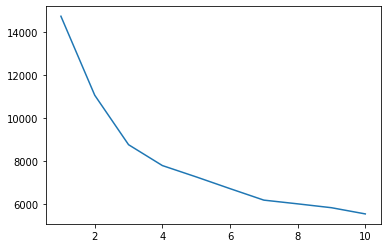

In [59]:
# TODO Plot Cluster SSE scores
plt.plot(range(1, 11), wcss)

In [ ]:
# Optional EDA:
# Use the newly created clusters as an additional data point for your EDA plots 

In [70]:
from sklearn.metrics import silhouette_score 
kmeans_n_clusters = 4 #TODO Determine the optimal value of k from ELBOW plot 

# fit kmeans model using this optimal value of k
kmeans = KMeans(n_clusters = 4, init = 'random', random_state = 0, max_iter = 300, n_init = 10)
kmeans.fit(X_train)

# Predict the cluster for each data point in the train and test datasets

train_preds = kmeans.predict(X_train)
test_preds = kmeans.predict(X_test)

# Given what you know about the data do you think our dataset will gain any usability by one hot encoding columns? 
# if so use the get_dummies without dropping the first feature this time
# and Add pred clusters to new versions of the train and test datasets you should use data_frame.copy()
# Name this cluster feature kmeans_cluster_id
kmeans_one_hot_encoding = "yes"

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# X_train_copy = X_train_copy + train_preds
# X_test_copy = X_test_copy + test_preds

# X_train_copy

# kmeans_cluster_id = pd.get_dummies(cat_features_raw, drop_first=False)



#  kmeans_train = 0 #TODO
#  kmeans_test = 0 #TODO

# # Calculate the mean silhouette coefficient for the number of clusters chosen
 kmeans_optimal_sse_score = 0

ValueError: ignored

In [55]:
section_3_2_1 = {
    "kmeans_n_clusters":kmeans_n_clusters,
    "kmeans_one_hot_encoding":kmeans_one_hot_encoding,
    "kmeans_optimal_sse_score": kmeans_optimal_sse_score
}

In [56]:
all_sections = {**section_1, **section_2, **section_3, **section_3_1_1, **section_3_1_2, **section_3_1_3, **section_3_2_1}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

#### **Section 3.2.2: Principal Component Analysis(PCA)**
What is Principal Component Analysis?

PCA is a dimensionality reduction framework in machine learning. According to Wikipedia, PCA (or Principal Component Analysis) is a “statistical procedure that uses orthogonal transformation to convert a set of observations of possibly correlated variables…into a set of values of linearly uncorrelated variables called principal components.”

The Benefits of PCA (Principal Component Analysis)
PCA is an unsupervised learning technique that offers a number of benefits. For example, by reducing the dimensionality of the data, PCA enables us to better generalize machine learning models. This helps us deal with the “curse of dimensionality”.

Most, if not all, algorithm performance depends on the dimension of the data. Models running on very high dimensional data might perform very slow—or even fail—and require significant server resources. PCA can help us improve performance at a very low cost of model accuracy. 

Other benefits of PCA include reduction of noise in the data, feature selection (to a certain extent), and the ability to produce independent, uncorrelated features of the data. PCA also allows us to visualize data and allow for the inspection of clustering/classification algorithms. 

**Directions:** please create a PCA with 5 features and set the randomness with your seed

In [ ]:
#Implement PCA
from sklearn.decomposition import PCA
pca = #TODO Implement PCA with 5 Components

# fit PCA using the training dataset and transform the train and test sets

principalComponents_train = 
principalComponents_test = 
# Create new Df with PCA Features generated from the train dataset you created in section 2
principalDf_train = pd.DataFrame(data = principalComponents_train
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5'])
principalDf_test = pd.DataFrame(data = principalComponents_test
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5'])

In [ ]:
#TODO Find the Percentage of variance explained by each of the selected components
pca_explainted_variance_ratio_component_1 = #TODO
pca_explainted_variance_ratio_component_2 = #TODO
pca_explainted_variance_ratio_component_3 = #TODO
pca_explainted_variance_ratio_component_4 = #TODO
pca_explainted_variance_ratio_component_5 = #TODO

Use the following Parameters in Kmeans:

kmeans_kwargs = {
...: "init": "random",
...: "n_init": 10,
...: "max_iter": 300,
...: "random_state": 0,
...: }

In [ ]:
#TODO train a different kmeans model for each value of k using the PCA dataset and log the SSE score for each k

In [ ]:
# TODO Plot Cluster SSE scores

In [ ]:
# Optional EDA:
# Use the newly created clusters as an additional data point for your EDA plots 

In [ ]:
pca_n_clusters = #TODO Determine the optimal value of k from ELBOW plot 

# fit kmeans model using this optimal value of k
kmeans = KMeans(n_clusters = n, init="random",n_init=10,max_iter=300,random_state=0)
kmeans.fit(principalDf_train)
# Predict the cluster for each data point in the train and test datasets
train_preds = kmeans.predict(principalDf_train)
test_preds = kmeans.predict(principalDf_test)

# Given what you know about the data do you think our dataset will gain any usability by one hot encoding columns? ("yes","no")
pca_one_hot_encoding = #TODO

# if so use the get_dummies without dropping the first feature this time
# and Add pred clusters to new versions of the train and test datasets you should use data_frame.copy()
# Name this cluster feature pca_kmeans_cluster_id

#Add pred clusters to train and test datasets
# Name this cluster feature pca_kmeans_cluster_id

pca_kmeans_train = #TODO
pca_kmeans_test = #TODO

# Calculate the mean silhouette coefficient for the number of clusters chosen
pca_optimal_sse_score = #TODO

In [ ]:
section_3_2_2 = {
    "pca_explainted_variance_ratio_component_1":round(pca_explainted_variance_ratio_component_1,4),
    "pca_explainted_variance_ratio_component_2":round(pca_explainted_variance_ratio_component_2,4),
    "pca_explainted_variance_ratio_component_3":round(pca_explainted_variance_ratio_component_3,4),
    "pca_explainted_variance_ratio_component_4":round(pca_explainted_variance_ratio_component_4,4),
    "pca_explainted_variance_ratio_component_5":round(pca_explainted_variance_ratio_component_5,4),
    "pca_one_hot_encoding":pca_one_hot_encoding,
    "pca_n_clusters": pca_n_clusters,
    "pca_optimal_sse_score": pca_optimal_sse_score
}

In [ ]:
all_sections = {**section_1, **section_2, **section_3, **section_3_1_1, **section_3_1_2, **section_3_1_3, **section_3_2_1,**section_3_2_2}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

### Section 3.3: Supervised and Unsupervised Models combined  
Next you will combine the Unsupervised and Supervised Machine Learning to predict the target Malware analysis with each of the two datasets you generated above (in the k-means and PCA sections)

#### **Section 3.3.1: K-means + Gradient Boosting**

Now use the K-means feature dataframe you generated for the k-means Clustering to train and test a Gradient Boosting model. Use the additional cluster feature as training/testing features and the (untouched) labels 



##### **Initialize Model**

- random state : np.random.RandomState(seed)
- learning rate : 0.1
- max depth : 3
- number of estimators : 100

In [ ]:
gradient_kmeans = #TODO

##### **Train Model**
Use the Train dataset features you created in section 3.2.1 and the targets you split in Section 2 to fit a model

In [ ]:
#TODO

##### **Analyze Model Results**
Use the Test Dataset features you created in section 3.2.1 and the targets you split in Section 2 to Analyze the Model's Performance

In [ ]:
gradient_kmeans_accuracy = #TODO
gradient_kmeans_recall = #TODO
gradient_kmeans_precision = #TODO
gradient_kmeans_fscore = #TODO
gradient_kmeans_roc_auc = #TODO

Find the Feature Importance of the Model and answer the following Questions:

Based on the Feature importance plot please identify the top 5 Features and the estimated importance to the model results
1. **TODO Enter Top ranked Feature and Relative importance 
2. **TODO Enter Second ranked Feature and Relative importance 
3. **TODO Enter Third ranked Feature and Relative importance 
4. **TODO Enter fourth ranked Feature and Relative importance  
5. **TODO Enter fifth ranked Feature and Relative importance 

In [ ]:
gradient_kmeans_top_feature_name = #TODO
gradient_kmeans_top_feature_relative_importance = #TODO
gradient_kmeans_second_feature_name = #TODO
gradient_kmeans_second_feature_relative_importance = #TODO
gradient_kmeans_third_feature_name = #TODO
gradient_kmeans_third_feature_relative_importance = #TODO
gradient_kmeans_fourth_feature_name = #TODO
gradient_kmeans_fourth_feature_relative_importance = #TODO
gradient_kmeans_fifth_feature_name = #TODO
gradient_kmeans_fifth_feature_relative_importance = #TODO

In [ ]:
section_3_3_1 = {
    "gradient_kmeans_accuracy": round(gradient_kmeans_accuracy,4),
    "gradient_kmeans_recall": round(gradient_kmeans_recall,4),
    "gradient_kmeans_precision": round(gradient_kmeans_precision,4),
    "gradient_kmeans_fscore": round(gradient_kmeans_fscore,4),
    "gradient_kmeans_roc_auc": round(gradient_kmeans_roc_auc,4),
    "gradient_kmeans_top_feature_name" : gradient_kmeans_top_feature_name,
    "gradient_kmeans_top_feature_relative_importance" : gradient_kmeans_top_feature_relative_importance,
    "gradient_kmeans_second_feature_name" : gradient_kmeans_second_feature_name,
    "gradient_kmeans_second_feature_relative_importance" : gradient_kmeans_second_feature_relative_importance,
    "gradient_kmeans_third_feature_name" : gradient_kmeans_third_feature_name,
    "gradient_kmeans_third_feature_relative_importance" : gradient_kmeans_third_feature_relative_importance,
    "gradient_kmeans_fourth_feature_name" : gradient_kmeans_fourth_feature_name,
    "gradient_kmeans_fourth_feature_relative_importance" : gradient_kmeans_fourth_feature_relative_importance,
    "gradient_kmeans_fifth_feature_name" : gradient_kmeans_fifth_feature_name,
    "gradient_kmeans_fifth_feature_relative_importance" : gradient_kmeans_fifth_feature_relative_importance
}

In [ ]:
all_sections = {**section_1, **section_2, **section_3, **section_3_1_1, **section_3_1_2, **section_3_1_3, **section_3_2_1,**section_3_2_2,**section_3_3_1}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

#### **Section 3.3.2: PCA Features + Gradient Boosting**

Now use the PCA feature dataframe you generated for the PCA Clustering to train and test a Gradient Boosting model. Use the PCA features as training/testing features and the (untouched) labels 

**(Make sure you didnt run PCA on the labels(class) and only ran it on the features!!)**


##### **Initialize Model**

- random state : np.random.RandomState(seed)
- learning rate : 0.1
- max depth : 3
- number of estimators : 100

In [ ]:
gradient_pca = #TODO

##### **Train Model**
Use the Train dataset features you created in section 3.2.2 and the targets you split in Section 2 to fit a model

In [ ]:
#TODO

##### **Analyze Model Results**
Use the Test Dataset features you created in section 3.2.2 and the targets you split in Section 2 to Analyze the Model's Performance

In [ ]:
gradient_pca_accuracy = #TODO
gradient_pca_recall = #TODO
gradient_pca_precision = #TODO
gradient_pca_fscore = #TODO
gradient_pca_roc_auc = #TODO

Find the Feature Importance of the Model and answer the following Questions:

Based on the Feature importance plot please identify the top 5 Features and the estimated importance to the model results
1. **TODO Enter Top ranked Feature and Relative importance 
2. **TODO Enter Second ranked Feature and Relative importance 
3. **TODO Enter Third ranked Feature and Relative importance 
4. **TODO Enter fourth ranked Feature and Relative importance  
5. **TODO Enter fifth ranked Feature and Relative importance 

In [ ]:
gradient_pca_top_feature_name = #TODO
gradient_pca_top_feature_relative_importance = #TODO
gradient_pca_second_feature_name = #TODO
gradient_pca_second_feature_relative_importance = #TODO
gradient_pca_third_feature_name = #TODO
gradient_pca_third_feature_relative_importance = #TODO
gradient_pca_fourth_feature_name = #TODO
gradient_pca_fourth_feature_relative_importance = #TODO
gradient_pca_fifth_feature_name = #TODO
gradient_pca_fifth_feature_relative_importance = #TODO

#### **Discussion Question 3: Were the cluster_ids in your top 5 features?**
Why do you think this was the case? Is there something about what PCA does that would make the kmeans clustering less relevant?
  
** TODO Provide your answer here

In [ ]:
section_3_3_2 = {
    "gradient_pca_accuracy": round(gradient_pca_accuracy,4),
    "gradient_pca_recall": round(gradient_pca_recall,4),
    "gradient_pca_precision": round(gradient_pca_precision,4),
    "gradient_pca_fscore": round(gradient_pca_fscore,4),
    "gradient_pca_roc_auc": round(gradient_pca_roc_auc,4),
    "gradient_pca_top_feature_name" : gradient_pca_top_feature_name,
    "gradient_pca_top_feature_relative_importance" : gradient_pca_top_feature_relative_importance,
    "gradient_pca_second_feature_name" : gradient_pca_second_feature_name,
    "gradient_pca_second_feature_relative_importance" : gradient_pca_second_feature_relative_importance,
    "gradient_pca_third_feature_name" : gradient_pca_third_feature_name,
    "gradient_pca_third_feature_relative_importance" : gradient_pca_third_feature_relative_importance,
    "gradient_pca_fourth_feature_name" : gradient_pca_fourth_feature_name,
    "gradient_pca_fourth_feature_relative_importance" : gradient_pca_fourth_feature_relative_importance,
    "gradient_pca_fifth_feature_name" : gradient_pca_fifth_feature_name,
    "gradient_pca_fifth_feature_relative_importance" : gradient_pca_fifth_feature_relative_importance
}

#### **Discussion Question 4: Which was the best model you trained in Section 3.3??**
Did this model outperform the supervised logistic regression, gradient boosting and random forest models you trained in Section 3.1 and why do you think it under or over performed compared to those models?    
** TODO Provide your answer here

## Combine JSON's into Submission file

In [ ]:
all_sections = {**section_1, **section_2, **section_3, **section_3_1_1, **section_3_1_2, **section_3_1_3, **section_3_2_1,**section_3_2_2,**section_3_3_1, **section_3_3_2}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))